# Hitran Study
======================

- author : Sylvie Dagoret-Campagne
- date :Jeudi 29 septembre 2016



In [1]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

/Users/dagoret-campagnesylvie/.local/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Get HAPI
---------------


Interface to access to Hitran database

In [2]:
from hapi import *

HAPI version: 1.1.0.6
To get the most up-to-date version please check http://hitran.org/hapi


## Connect to the Hitran database
-------------------------------------------


In [3]:
db_begin('data')

Using data

H2O
                     Lines parsed: 36813
NO2
                     Lines parsed: 2300
O2
                     Lines parsed: 418
O3
                     Lines parsed: 16584


## Fetch H2O lines
---------------------------

- $\nu_{min} = 10000 cm^{-1} \rightarrow \lambda_{max} = 1000 nm$
- $\nu_{max} = 20000 cm^{-1}  \rightarrow \lambda_{min} = 500 nm $

In [4]:
fetch('H2O',1,1,10000,20000)

BEGIN DOWNLOAD: H2O
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  655

In [5]:
tableList()

['sampletab', 'O3', 'H2O', 'NO2', 'O2']

In [6]:
describeTable('H2O')

-----------------------------------------
H2O summary:
-----------------------------------------
Comment: 
Contains lines for H2(16O)
 in 10000.000-20000.000 wavenumber range
Number of rows: 64023
Table type: column-fixed
-----------------------------------------
            PAR_NAME           PAR_FORMAT

            molec_id                  %2d
        local_iso_id                  %1d
                  nu               %12.6f
                  sw               %10.3E
                   a               %10.3E
           gamma_air                %5.4f
          gamma_self                %5.3f
              elower               %10.4f
               n_air                %4.2f
           delta_air                %8.6f
 global_upper_quanta                 %15s
 global_lower_quanta                 %15s
  local_upper_quanta                 %15s
  local_lower_quanta                 %15s
                ierr                  %6s
                iref                 %12s
    line_mixing_flag 

In [7]:
absspec=select('H2O',ParameterNames=('nu','sw'),Conditions=('between','nu',10000,20000))

          nu         S
10000.092994 1.558E-27
10000.319809 6.915E-28
10000.437065 1.548E-27
10000.649100 1.129E-29
10000.666808 2.052E-29
10000.706729 8.313E-28
10000.891443 4.336E-27
10000.926052 1.047E-28
10001.283088 2.472E-29
10001.427458 1.088E-29
10001.591850 1.788E-29
10001.867886 6.060E-27
10001.951809 9.665E-29
10002.091553 1.254E-27
10002.243129 3.462E-27
10002.361972 8.384E-29
10002.486265 7.562E-26
10003.052900 3.019E-28
10003.066257 2.630E-26
10003.339903 2.397E-28
10003.356434 6.941E-28
10003.403300 1.420E-28
10003.447402 2.393E-29
10003.564030 4.794E-28
10003.721300 1.605E-29
10003.899235 4.785E-27
10004.058403 9.480E-29
10004.070083 7.102E-26
10004.104853 2.371E-27
10004.304554 6.388E-25
10004.320209 4.209E-27
10004.329397 8.833E-29
10004.435400 8.533E-29
10004.679224 3.803E-28
10004.918568 1.419E-28
10005.348750 1.033E-27
10005.488958 1.172E-29
10005.706041 7.328E-28
10005.822226 1.142E-29
10006.019124 1.546E-26
10006.095765 4.922E-28
10006.277886 7.099E-27
10006.53707

In [8]:
nu2,sw2 = getColumns('H2O',['nu','sw'])

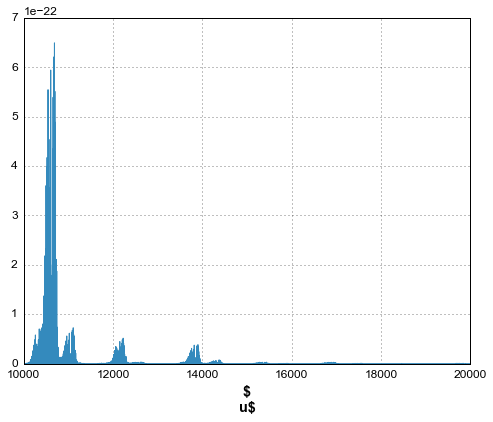

In [9]:

plt.plot(nu2,sw2)
plt.xlabel('$\nu$')

In [10]:
I_h2o=np.array(sw2)

In [11]:
wl_h2o=1e7/np.array(nu2)

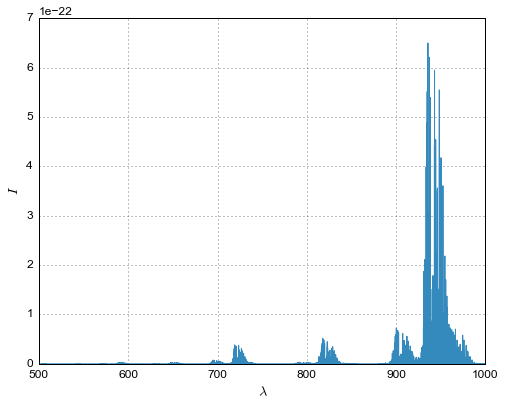

In [12]:
plt.plot(wl_h2o,I_h2o)
plt.ylabel(' $I$')
plt.xlabel(' $\lambda$')

In [13]:
nu3,coef = absorptionCoefficient_Lorentz(SourceTables='H2O')

In [14]:
wl3=1e7/np.array(nu3)

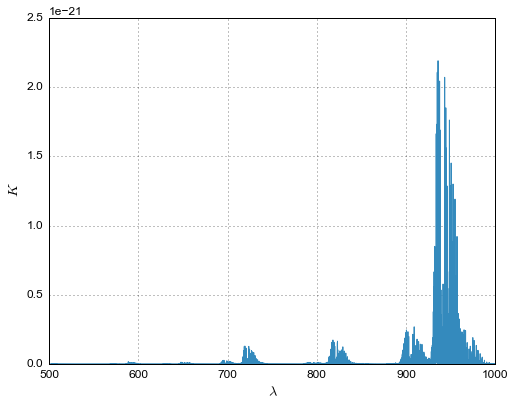

In [15]:
plt.plot(wl3,coef)
plt.ylabel(' $K$')
plt.xlabel(' $\lambda$')

## Fetch O2 lines
---------------------------

- $\nu_{min} = 10000 cm^{-1} \rightarrow \lambda_{max} = 1000 nm$
- $\nu_{max} = 20000 cm^{-1}  \rightarrow \lambda_{min} = 500 nm $

In [16]:
fetch('O2',7,1,10000,20000)

BEGIN DOWNLOAD: O2
  65536 bytes written to data/O2.data
  65536 bytes written to data/O2.data
Header written to data/O2.header
END DOWNLOAD
                     Lines parsed: 418
PROCESSED


In [17]:
nu4,coef4 = absorptionCoefficient_Lorentz(SourceTables='O2')

In [18]:
wl4=1e7/np.array(nu4)

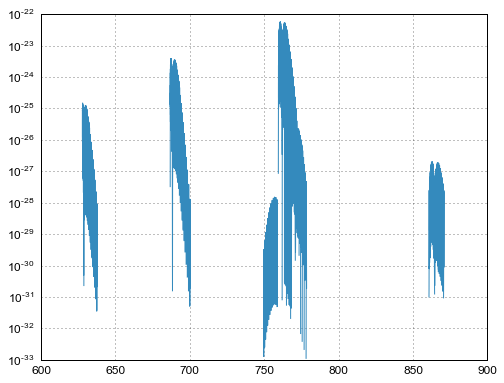

In [30]:
plt.semilogy(wl4,coef4)

## O3

In [20]:
fetch('O3',3,1,5000,50000)

BEGIN DOWNLOAD: O3
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O

In [21]:
fetch_by_ids('O3',[16,17,18,19,20],5000,30000)

BEGIN DOWNLOAD: O3
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O

In [22]:
getHelp(fetch)

Help on function fetch in module hapi:

fetch(TableName, M, I, numin, numax, ParameterGroups=[], Parameters=[])
    INPUT PARAMETERS: 
        TableName:   local table name to fetch in (required)
        M:           HITRAN molecule number       (required)
        I:           HITRAN isotopologue number   (required)
        numin:       lower wavenumber bound       (required)
        numax:       upper wavenumber bound       (required)
    OUTPUT PARAMETERS: 
        none
    ---
    DESCRIPTION:
        Download line-by-line data from HITRANonline server
        and save it to local table. The input parameters M and I
        are the HITRAN molecule and isotopologue numbers.
        This function results in a table containing single 
        isotopologue specie. To have multiple species in a 
        single table use fetch_by_ids instead.
    ---
    EXAMPLE OF USAGE:
        fetch('HOH',1,1,4000,4100)
    ---



In [23]:
nu5,coef5 = absorptionCoefficient_Lorentz(SourceTables='O3')

In [24]:
wl5=1e7/np.array(nu5)

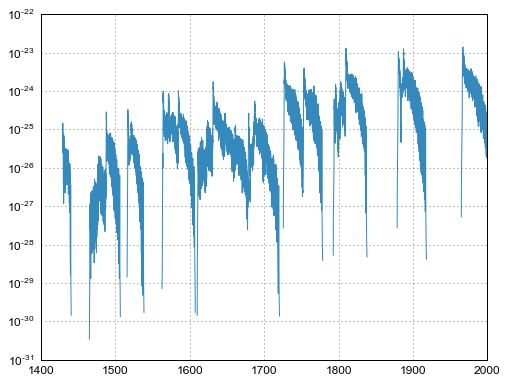

In [32]:
plt.semilogy(wl5,coef5)

# NO2

In [26]:
fetch('NO2',4,1,5000,50000)

BEGIN DOWNLOAD: NO2
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
Header written to data/NO2.header
END DOWNLOAD
                     Lines parsed: 2300
PROCESSED


In [27]:
nu6,coef6 = absorptionCoefficient_Lorentz(SourceTables='NO2')

In [28]:
wl6=1e7/np.array(nu6)

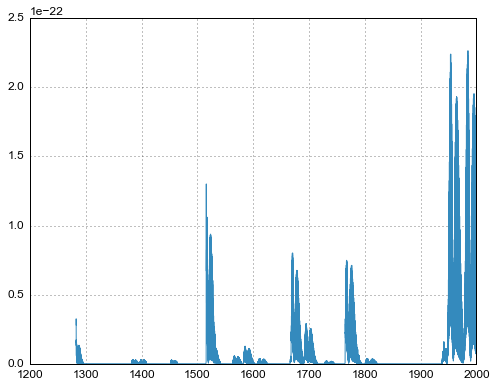

In [29]:
plt.plot(wl6,coef6)